In [ ]:
#importing the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

import mlxtend
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

Problem-1)
Prepare rules for Book data set

*Try different values of support and confidence. Observe the change in number of rules for different support,confidence values

*Change the minimum length in apriori algorithm

*Visulize the obtained rules using different plots

Solution:

In [ ]:
#loading the data 
from google.colab import files
uploaded=files.upload()

Saving book.csv to book.csv


In [ ]:
book=pd.read_csv('book.csv')
book

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


Basic & EDA

In [ ]:
book.shape

(2000, 11)

In [ ]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [ ]:
book.isna().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [ ]:
book.isnull().sum()/(len(book))*100

ChildBks     0.0
YouthBks     0.0
CookBks      0.0
DoItYBks     0.0
RefBks       0.0
ArtBks       0.0
GeogBks      0.0
ItalCook     0.0
ItalAtlas    0.0
ItalArt      0.0
Florence     0.0
dtype: float64

In [ ]:
for i in book.columns:
  print('\n Number of unique oservations in',book[i].name,':',len(book[i].unique()))
  print(' \n Different observations with count in ',book[i].name,':\n',book[i].value_counts())
  print('------------------------------------------------------------------')



 Number of unique oservations in ChildBks : 2
 
 Different observations with count in  ChildBks :
 0    1154
1     846
Name: ChildBks, dtype: int64
------------------------------------------------------------------

 Number of unique oservations in YouthBks : 2
 
 Different observations with count in  YouthBks :
 0    1505
1     495
Name: YouthBks, dtype: int64
------------------------------------------------------------------

 Number of unique oservations in CookBks : 2
 
 Different observations with count in  CookBks :
 0    1138
1     862
Name: CookBks, dtype: int64
------------------------------------------------------------------

 Number of unique oservations in DoItYBks : 2
 
 Different observations with count in  DoItYBks :
 0    1436
1     564
Name: DoItYBks, dtype: int64
------------------------------------------------------------------

 Number of unique oservations in RefBks : 2
 
 Different observations with count in  RefBks :
 0    1571
1     429
Name: RefBks, dtype: in

In [ ]:
book.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
book_sale_counts=pd.DataFrame(book.sum()).reset_index()
book_sale_counts.rename(columns={'index':'book_name',0:'sales'},inplace=True)
book_sale_counts=book_sale_counts.sort_values('sales',ascending=False).reset_index()
book_sale_counts=book_sale_counts.drop('index',axis=1)
book_sale_counts

,book_name,sales
0,CookBks,862
1,ChildBks,846
2,DoItYBks,564
3,GeogBks,552
4,YouthBks,495
5,ArtBks,482
6,RefBks,429
7,ItalCook,227
8,Florence,217
9,ItalArt,97


Visualizing the data points

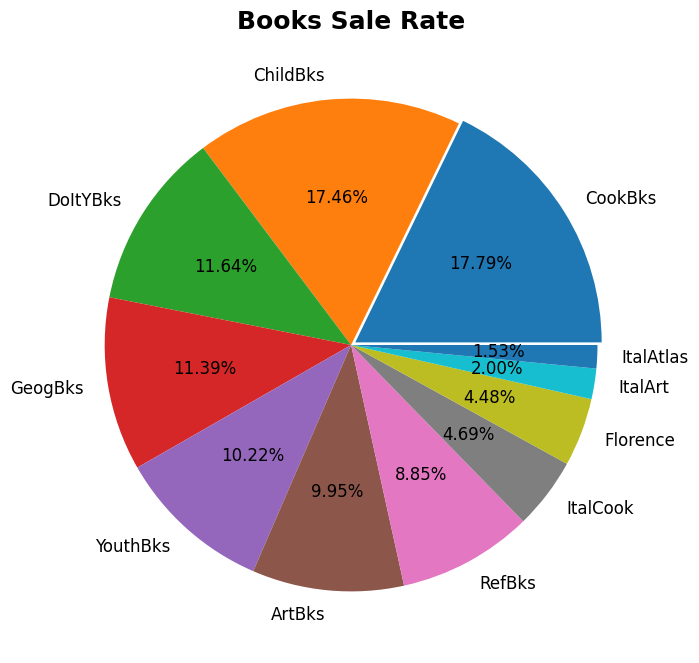

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(book_sale_counts['sales'], labels=book_sale_counts['book_name'],
        explode=[0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
        autopct= '%.2f%%',textprops={'size':12})

plt.title("Books Sale Rate",fontsize = 18, fontweight ='bold')
plt.show()

Text(0.5, 1.0, 'Books Sale Frequency')

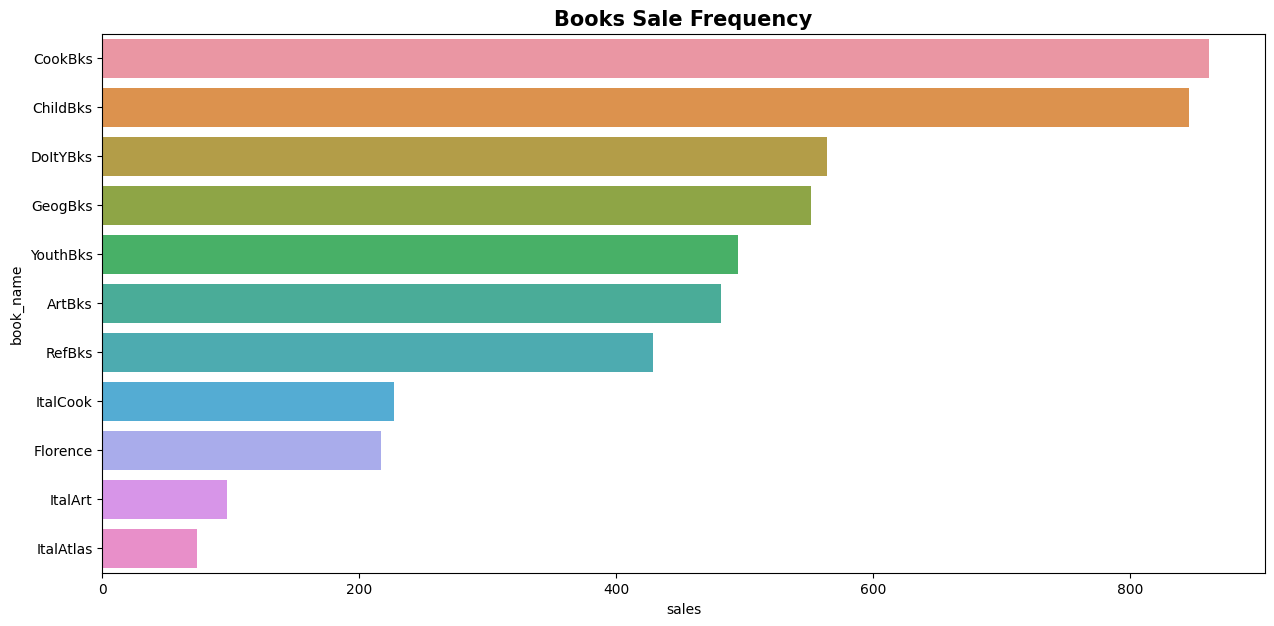

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x= 'sales',y='book_name',data=book_sale_counts)
plt.title('Books Sale Frequency',fontsize=15, fontweight='bold')

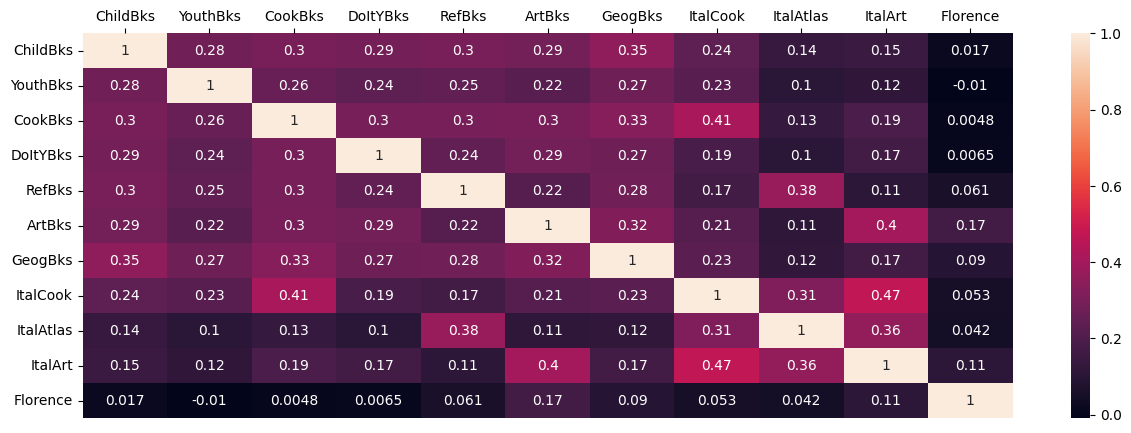

In [ ]:
#plotting the heatmap for correlation
plt.figure(figsize=(15,5))
ax = sns.heatmap(book.corr(), annot=True)
ax.xaxis.tick_top()

Apriori Alogrithm

Trail-1
Support 11%, Confidence 30%

In [ ]:
from mlxtend.frequent_patterns import apriori,association_rules
frequent_itemsets1=apriori(book,min_support=0.11,use_colnames=True)
frequent_itemsets1

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1650,"(ChildBks, YouthBks)"
9,0.2560,"(CookBks, ChildBks)"


In [ ]:
rules1=association_rules(frequent_itemsets1,metric="lift",min_threshold=0.3)
rules1_sorted=rules1.sort_values('lift',ascending=False)
rules1_sorted

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
26,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
27,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
48,"(CookBks, ChildBks)",(RefBks),0.2560,0.2145,0.1225,0.478516,2.230842,0.067588,1.506277
53,(RefBks),"(CookBks, ChildBks)",0.2145,0.2560,0.1225,0.571096,2.230842,0.067588,1.734652
65,(GeogBks),"(CookBks, ChildBks)",0.2760,0.2560,0.1495,0.541667,2.115885,0.078844,1.623273
...,...,...,...,...,...,...,...,...,...
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
12,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678
13,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240


In [ ]:
rules1_sorted.iloc[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
26,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
27,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
48,"(CookBks, ChildBks)",(RefBks),0.2560,0.2145,0.1225,0.478516,2.230842,0.067588,1.506277
53,(RefBks),"(CookBks, ChildBks)",0.2145,0.2560,0.1225,0.571096,2.230842,0.067588,1.734652
65,(GeogBks),"(CookBks, ChildBks)",0.2760,0.2560,0.1495,0.541667,2.115885,0.078844,1.623273
60,"(CookBks, ChildBks)",(GeogBks),0.2560,0.2760,0.1495,0.583984,2.115885,0.078844,1.740319
54,"(CookBks, ChildBks)",(ArtBks),0.2560,0.2410,0.1265,0.494141,2.050376,0.064804,1.500417
59,(ArtBks),"(CookBks, ChildBks)",0.2410,0.2560,0.1265,0.524896,2.050376,0.064804,1.565974
41,(YouthBks),"(CookBks, ChildBks)",0.2475,0.2560,0.1290,0.521212,2.035985,0.065640,1.553924
36,"(CookBks, ChildBks)",(YouthBks),0.2560,0.2475,0.1290,0.503906,2.035985,0.065640,1.516850


Text(0.5, 0, 'lift')

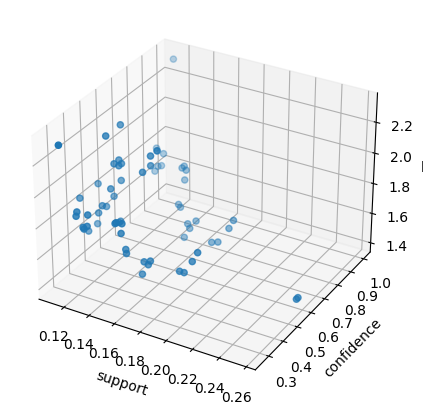

In [ ]:
fig1 = plt.figure(figsize=(15,5))
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(rules1_sorted['support'],rules1_sorted['confidence'],rules1_sorted['lift'])
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

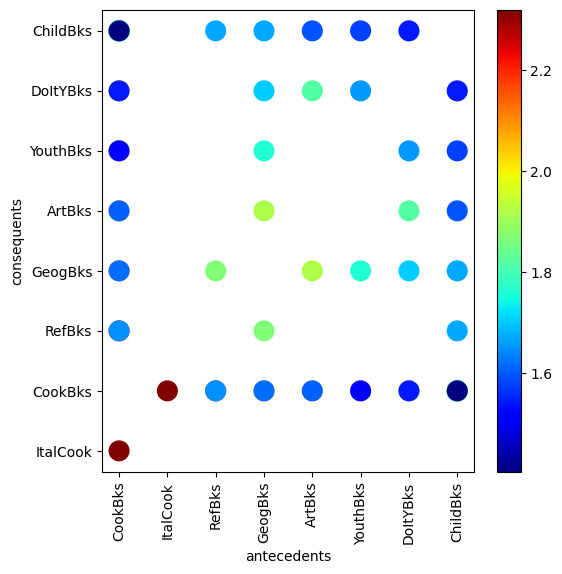

In [ ]:
X = rules1_sorted.antecedents
Y = rules1_sorted.consequents
Z = rules1_sorted.lift
X = X.apply(lambda x: list(x)[0]).astype("unicode")
Y = Y.apply(lambda x: list(x)[0]).astype("unicode")
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)
sc1 = plt.scatter(X,Y, s = 200, c=Z, cmap=plt.cm.jet)
cbar = fig.colorbar(sc1, orientation='vertical')    
plt.xticks(rotation=90)
plt.xlabel("antecedents")
plt.ylabel("consequents")
plt.show()

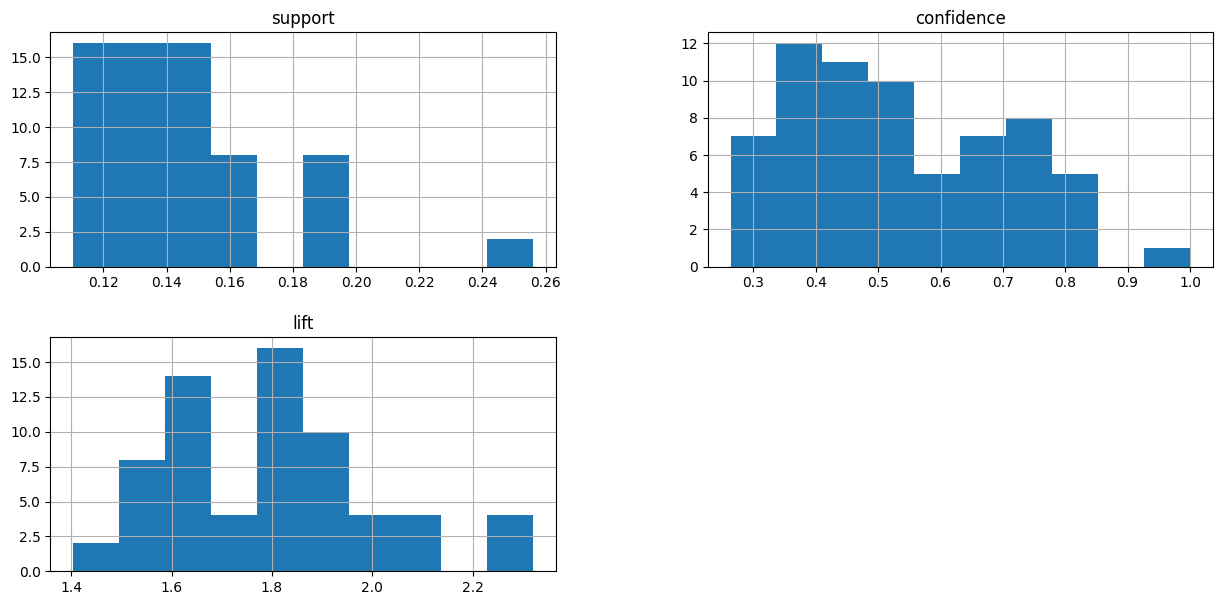

In [ ]:
rules1[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

Trail-2
Support 13%, Confidence 50%

In [ ]:
frequent_itemsets2=apriori(book,min_support=0.13,use_colnames=True)
frequent_itemsets2

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1650,"(ChildBks, YouthBks)"
8,0.2560,"(CookBks, ChildBks)"
9,0.1840,"(ChildBks, DoItYBks)"


In [ ]:
rules2=association_rules(frequent_itemsets2,metric="lift",min_threshold=0.5)
rules2_sorted=rules2.sort_values('lift',ascending=False)
rules2_sorted

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
35,(GeogBks),"(CookBks, ChildBks)",0.2760,0.2560,0.1495,0.541667,2.115885,0.078844,1.623273
30,"(CookBks, ChildBks)",(GeogBks),0.2560,0.2760,0.1495,0.583984,2.115885,0.078844,1.740319
24,"(CookBks, ChildBks)",(DoItYBks),0.2560,0.2820,0.1460,0.570312,2.022385,0.073808,1.670982
29,(DoItYBks),"(CookBks, ChildBks)",0.2820,0.2560,0.1460,0.517730,2.022385,0.073808,1.542706
26,"(ChildBks, DoItYBks)",(CookBks),0.1840,0.4310,0.1460,0.793478,1.841017,0.066696,2.755158
27,(CookBks),"(ChildBks, DoItYBks)",0.4310,0.1840,0.1460,0.338747,1.841017,0.066696,1.234021
25,"(CookBks, DoItYBks)",(ChildBks),0.1875,0.4230,0.1460,0.778667,1.840820,0.066687,2.606928
28,(ChildBks),"(CookBks, DoItYBks)",0.4230,0.1875,0.1460,0.345154,1.840820,0.066687,1.240749
34,(ChildBks),"(CookBks, GeogBks)",0.4230,0.1925,0.1495,0.353428,1.835989,0.068072,1.248894
31,"(CookBks, GeogBks)",(ChildBks),0.1925,0.4230,0.1495,0.776623,1.835989,0.068072,2.583081


In [ ]:
rules2_sorted.iloc[0:15]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
35,(GeogBks),"(CookBks, ChildBks)",0.2760,0.2560,0.1495,0.541667,2.115885,0.078844,1.623273
30,"(CookBks, ChildBks)",(GeogBks),0.2560,0.2760,0.1495,0.583984,2.115885,0.078844,1.740319
24,"(CookBks, ChildBks)",(DoItYBks),0.2560,0.2820,0.1460,0.570312,2.022385,0.073808,1.670982
29,(DoItYBks),"(CookBks, ChildBks)",0.2820,0.2560,0.1460,0.517730,2.022385,0.073808,1.542706
26,"(ChildBks, DoItYBks)",(CookBks),0.1840,0.4310,0.1460,0.793478,1.841017,0.066696,2.755158
27,(CookBks),"(ChildBks, DoItYBks)",0.4310,0.1840,0.1460,0.338747,1.841017,0.066696,1.234021
25,"(CookBks, DoItYBks)",(ChildBks),0.1875,0.4230,0.1460,0.778667,1.840820,0.066687,2.606928
28,(ChildBks),"(CookBks, DoItYBks)",0.4230,0.1875,0.1460,0.345154,1.840820,0.066687,1.240749
34,(ChildBks),"(CookBks, GeogBks)",0.4230,0.1925,0.1495,0.353428,1.835989,0.068072,1.248894
31,"(CookBks, GeogBks)",(ChildBks),0.1925,0.4230,0.1495,0.776623,1.835989,0.068072,2.583081


Text(0.5, 0, 'lift')

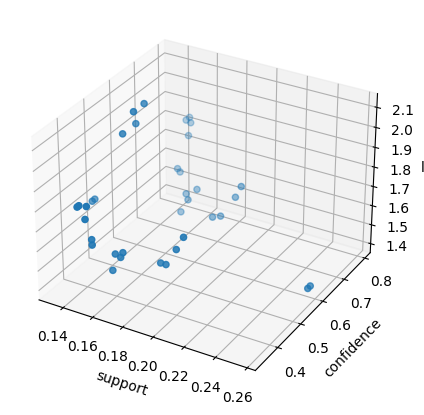

In [ ]:
fig1 = plt.figure(figsize=(15,5))
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(rules2_sorted['support'],rules2_sorted['confidence'],rules2_sorted['lift'])
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

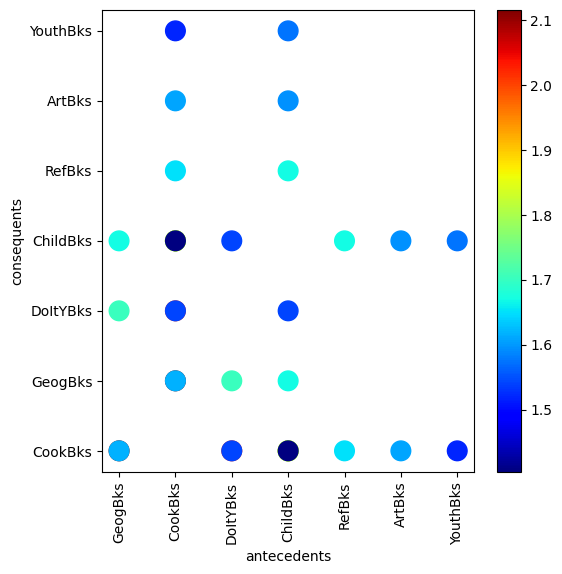

In [ ]:
X = rules2_sorted.antecedents
Y = rules2_sorted.consequents
Z = rules2_sorted.lift
X = X.apply(lambda x: list(x)[0]).astype("unicode")
Y = Y.apply(lambda x: list(x)[0]).astype("unicode")
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)
sc1 = plt.scatter(X,Y, s = 200, c=Z, cmap=plt.cm.jet)
cbar = fig.colorbar(sc1, orientation='vertical')    
plt.xticks(rotation=90)
plt.xlabel("antecedents")
plt.ylabel("consequents")
plt.show()

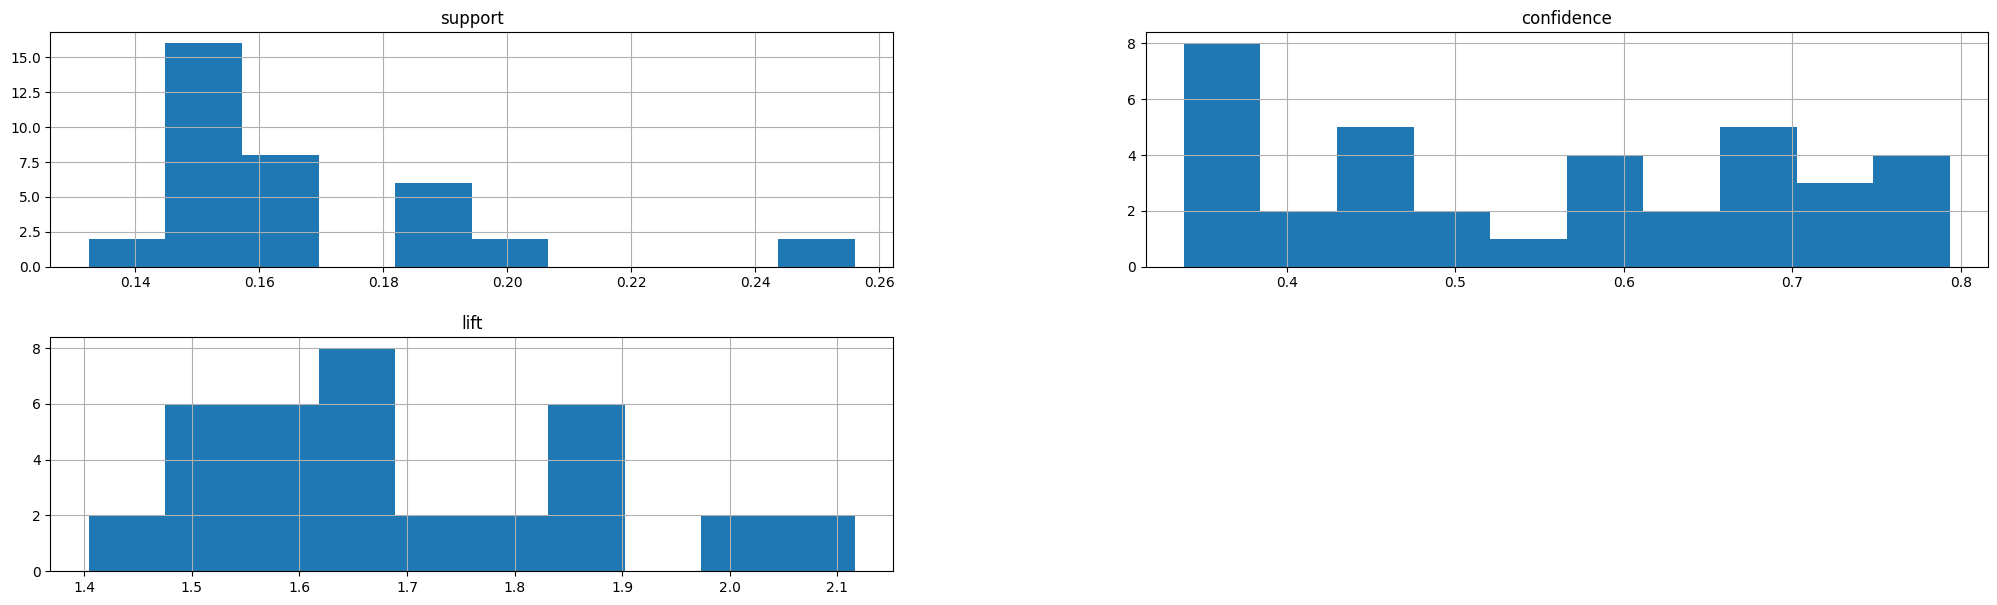

In [ ]:
rules2[['support','confidence','lift']].hist(figsize=(25,7))
plt.show()

Trail-3
Support 15%, Confidence 70%

In [ ]:
frequent_itemsets3=apriori(book,min_support=0.15,use_colnames=True)
frequent_itemsets3

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1650,"(ChildBks, YouthBks)"
8,0.2560,"(CookBks, ChildBks)"
9,0.1840,"(ChildBks, DoItYBks)"


In [ ]:
rules3=association_rules(frequent_itemsets3,metric="lift",min_threshold=0.7).reset_index()
rules3_sorted=rules3.sort_values('lift',ascending=False)
rules3_sorted

,index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
10,10,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211
11,11,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
6,6,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
7,7,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
17,17,(RefBks),(CookBks),0.2145,0.4310,0.1525,0.710956,1.649549,0.060050,1.968556
16,16,(CookBks),(RefBks),0.4310,0.2145,0.1525,0.353828,1.649549,0.060050,1.215621
20,20,(CookBks),(GeogBks),0.4310,0.2760,0.1925,0.446636,1.618245,0.073544,1.308361
21,21,(GeogBks),(CookBks),0.2760,0.4310,0.1925,0.697464,1.618245,0.073544,1.880766
18,18,(CookBks),(ArtBks),0.4310,0.2410,0.1670,0.387471,1.607763,0.063129,1.239125
19,19,(ArtBks),(CookBks),0.2410,0.4310,0.1670,0.692946,1.607763,0.063129,1.853095


In [ ]:
rules3_sorted.iloc[0:20]

,index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
10,10,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211
11,11,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
6,6,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
7,7,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
17,17,(RefBks),(CookBks),0.2145,0.4310,0.1525,0.710956,1.649549,0.060050,1.968556
16,16,(CookBks),(RefBks),0.4310,0.2145,0.1525,0.353828,1.649549,0.060050,1.215621
20,20,(CookBks),(GeogBks),0.4310,0.2760,0.1925,0.446636,1.618245,0.073544,1.308361
21,21,(GeogBks),(CookBks),0.2760,0.4310,0.1925,0.697464,1.618245,0.073544,1.880766
18,18,(CookBks),(ArtBks),0.4310,0.2410,0.1670,0.387471,1.607763,0.063129,1.239125
19,19,(ArtBks),(CookBks),0.2410,0.4310,0.1670,0.692946,1.607763,0.063129,1.853095


Text(0.5, 0, 'lift')

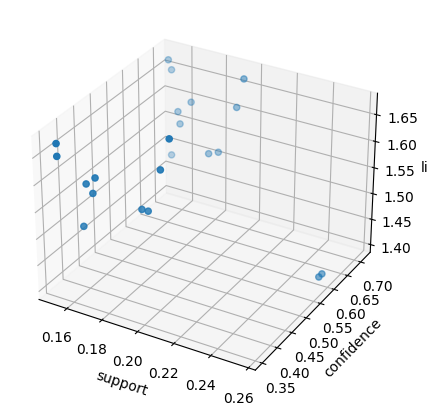

In [ ]:
fig1 = plt.figure(figsize=(15,5))
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(rules3_sorted['support'],rules3_sorted['confidence'],rules3_sorted['lift'])
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

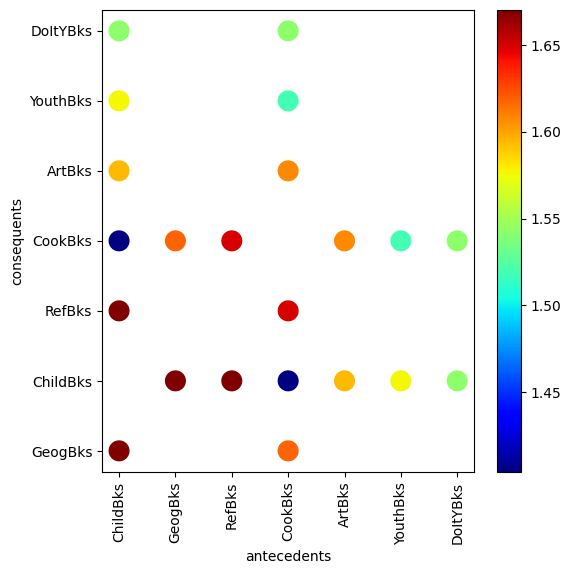

In [ ]:
X = rules3_sorted.antecedents
Y = rules3_sorted.consequents
Z = rules3_sorted.lift
X = X.apply(lambda x: list(x)[0]).astype("unicode")
Y = Y.apply(lambda x: list(x)[0]).astype("unicode")
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)
sc1 = plt.scatter(X,Y, s = 200, c=Z, cmap=plt.cm.jet)
cbar = fig.colorbar(sc1, orientation='vertical')    
plt.xticks(rotation=90)
plt.xlabel("antecedents")
plt.ylabel("consequents")
plt.show()

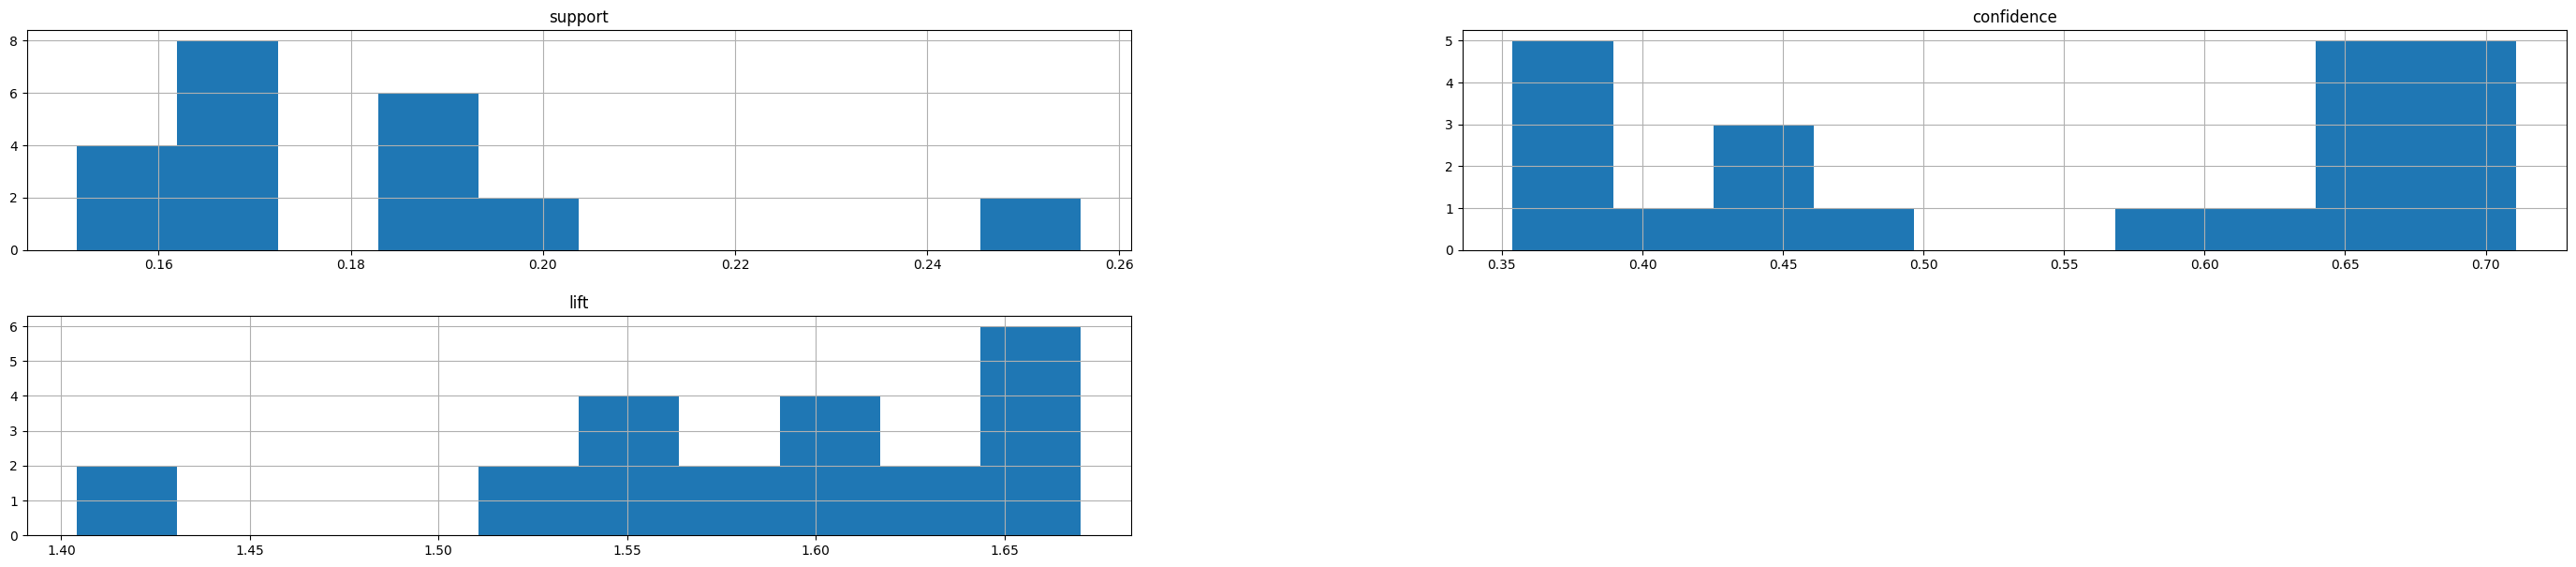

In [ ]:
rules3[['support','confidence','lift']].hist(figsize=(35,7))
plt.show()

Conclusion

In [ ]:
def lift_plot(table):
  plt.figure(figsize=(7,7), dpi= 300)
  sns.heatmap(table.pivot('antecedents','consequents','lift'), annot=True)
  plt.title('HeatMap - Antecedents,Consequents and Lift -Matrix',fontsize= 15)
  plt.yticks(rotation=0, fontsize= 5)
  plt.xticks(rotation=40, fontsize= 5)
  plt.show()

 Trail1 support = 11%,confidence=30%


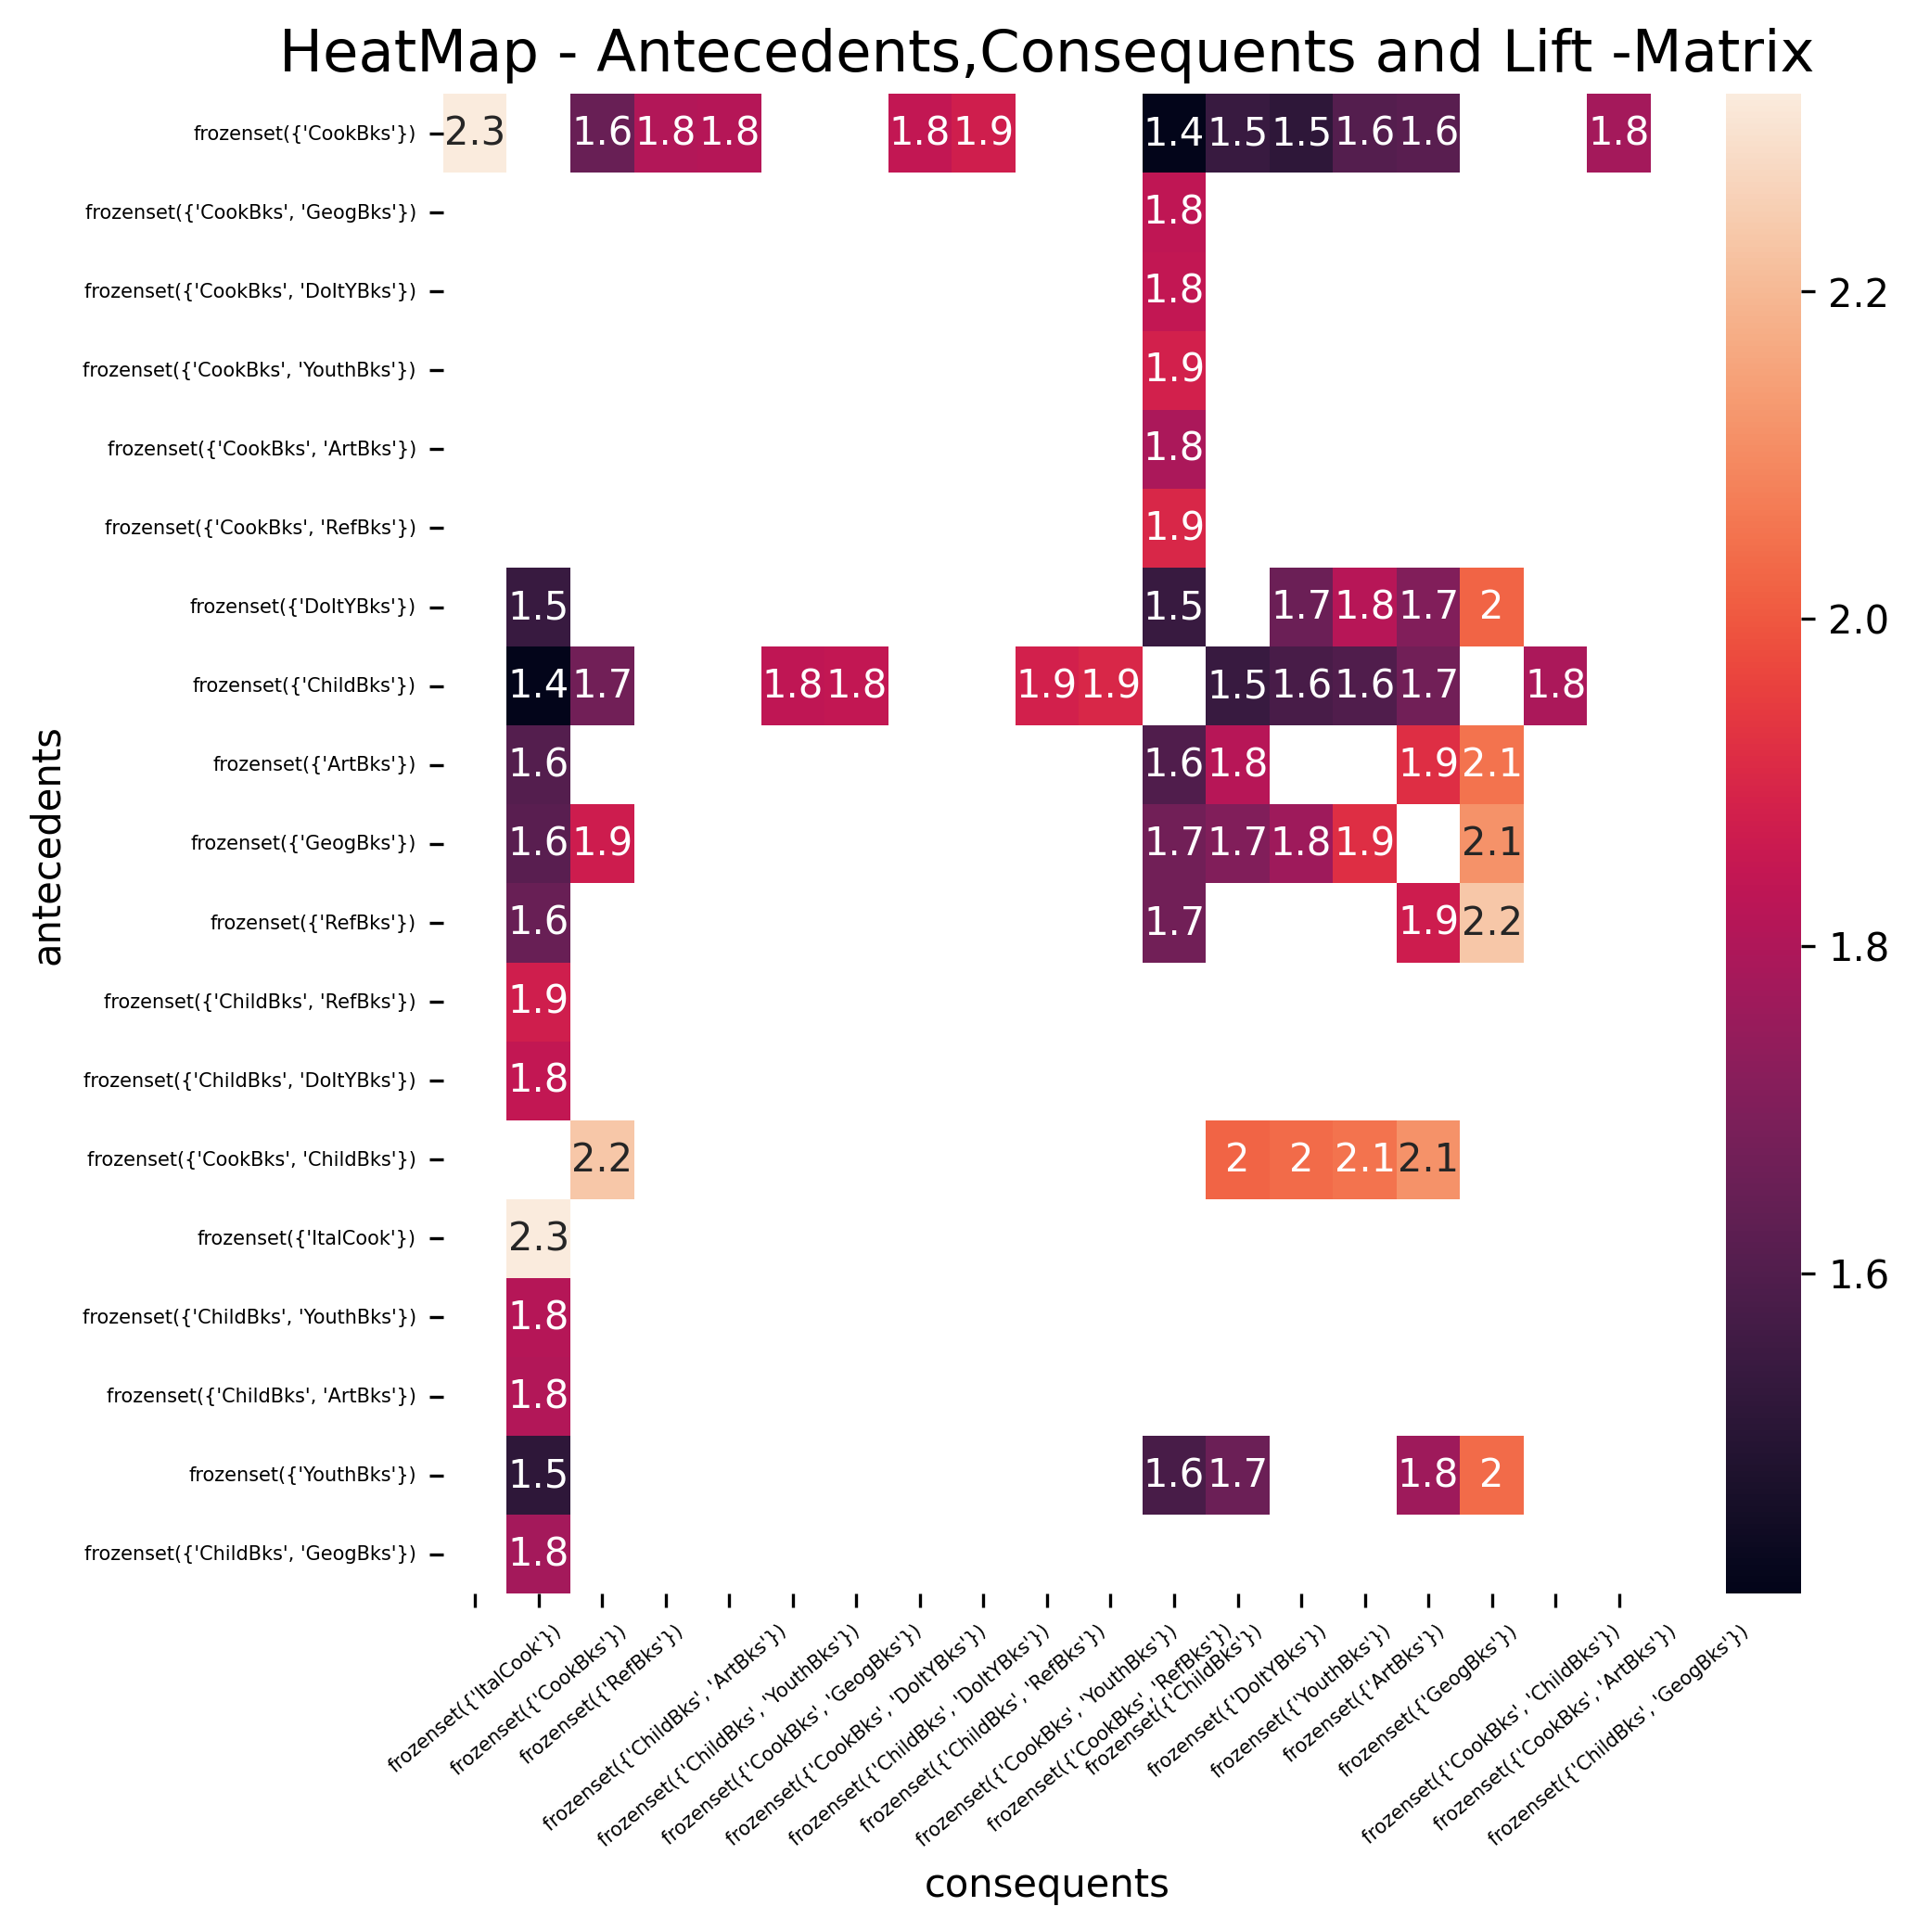


 Trail2 support = 13%,confidence=50%


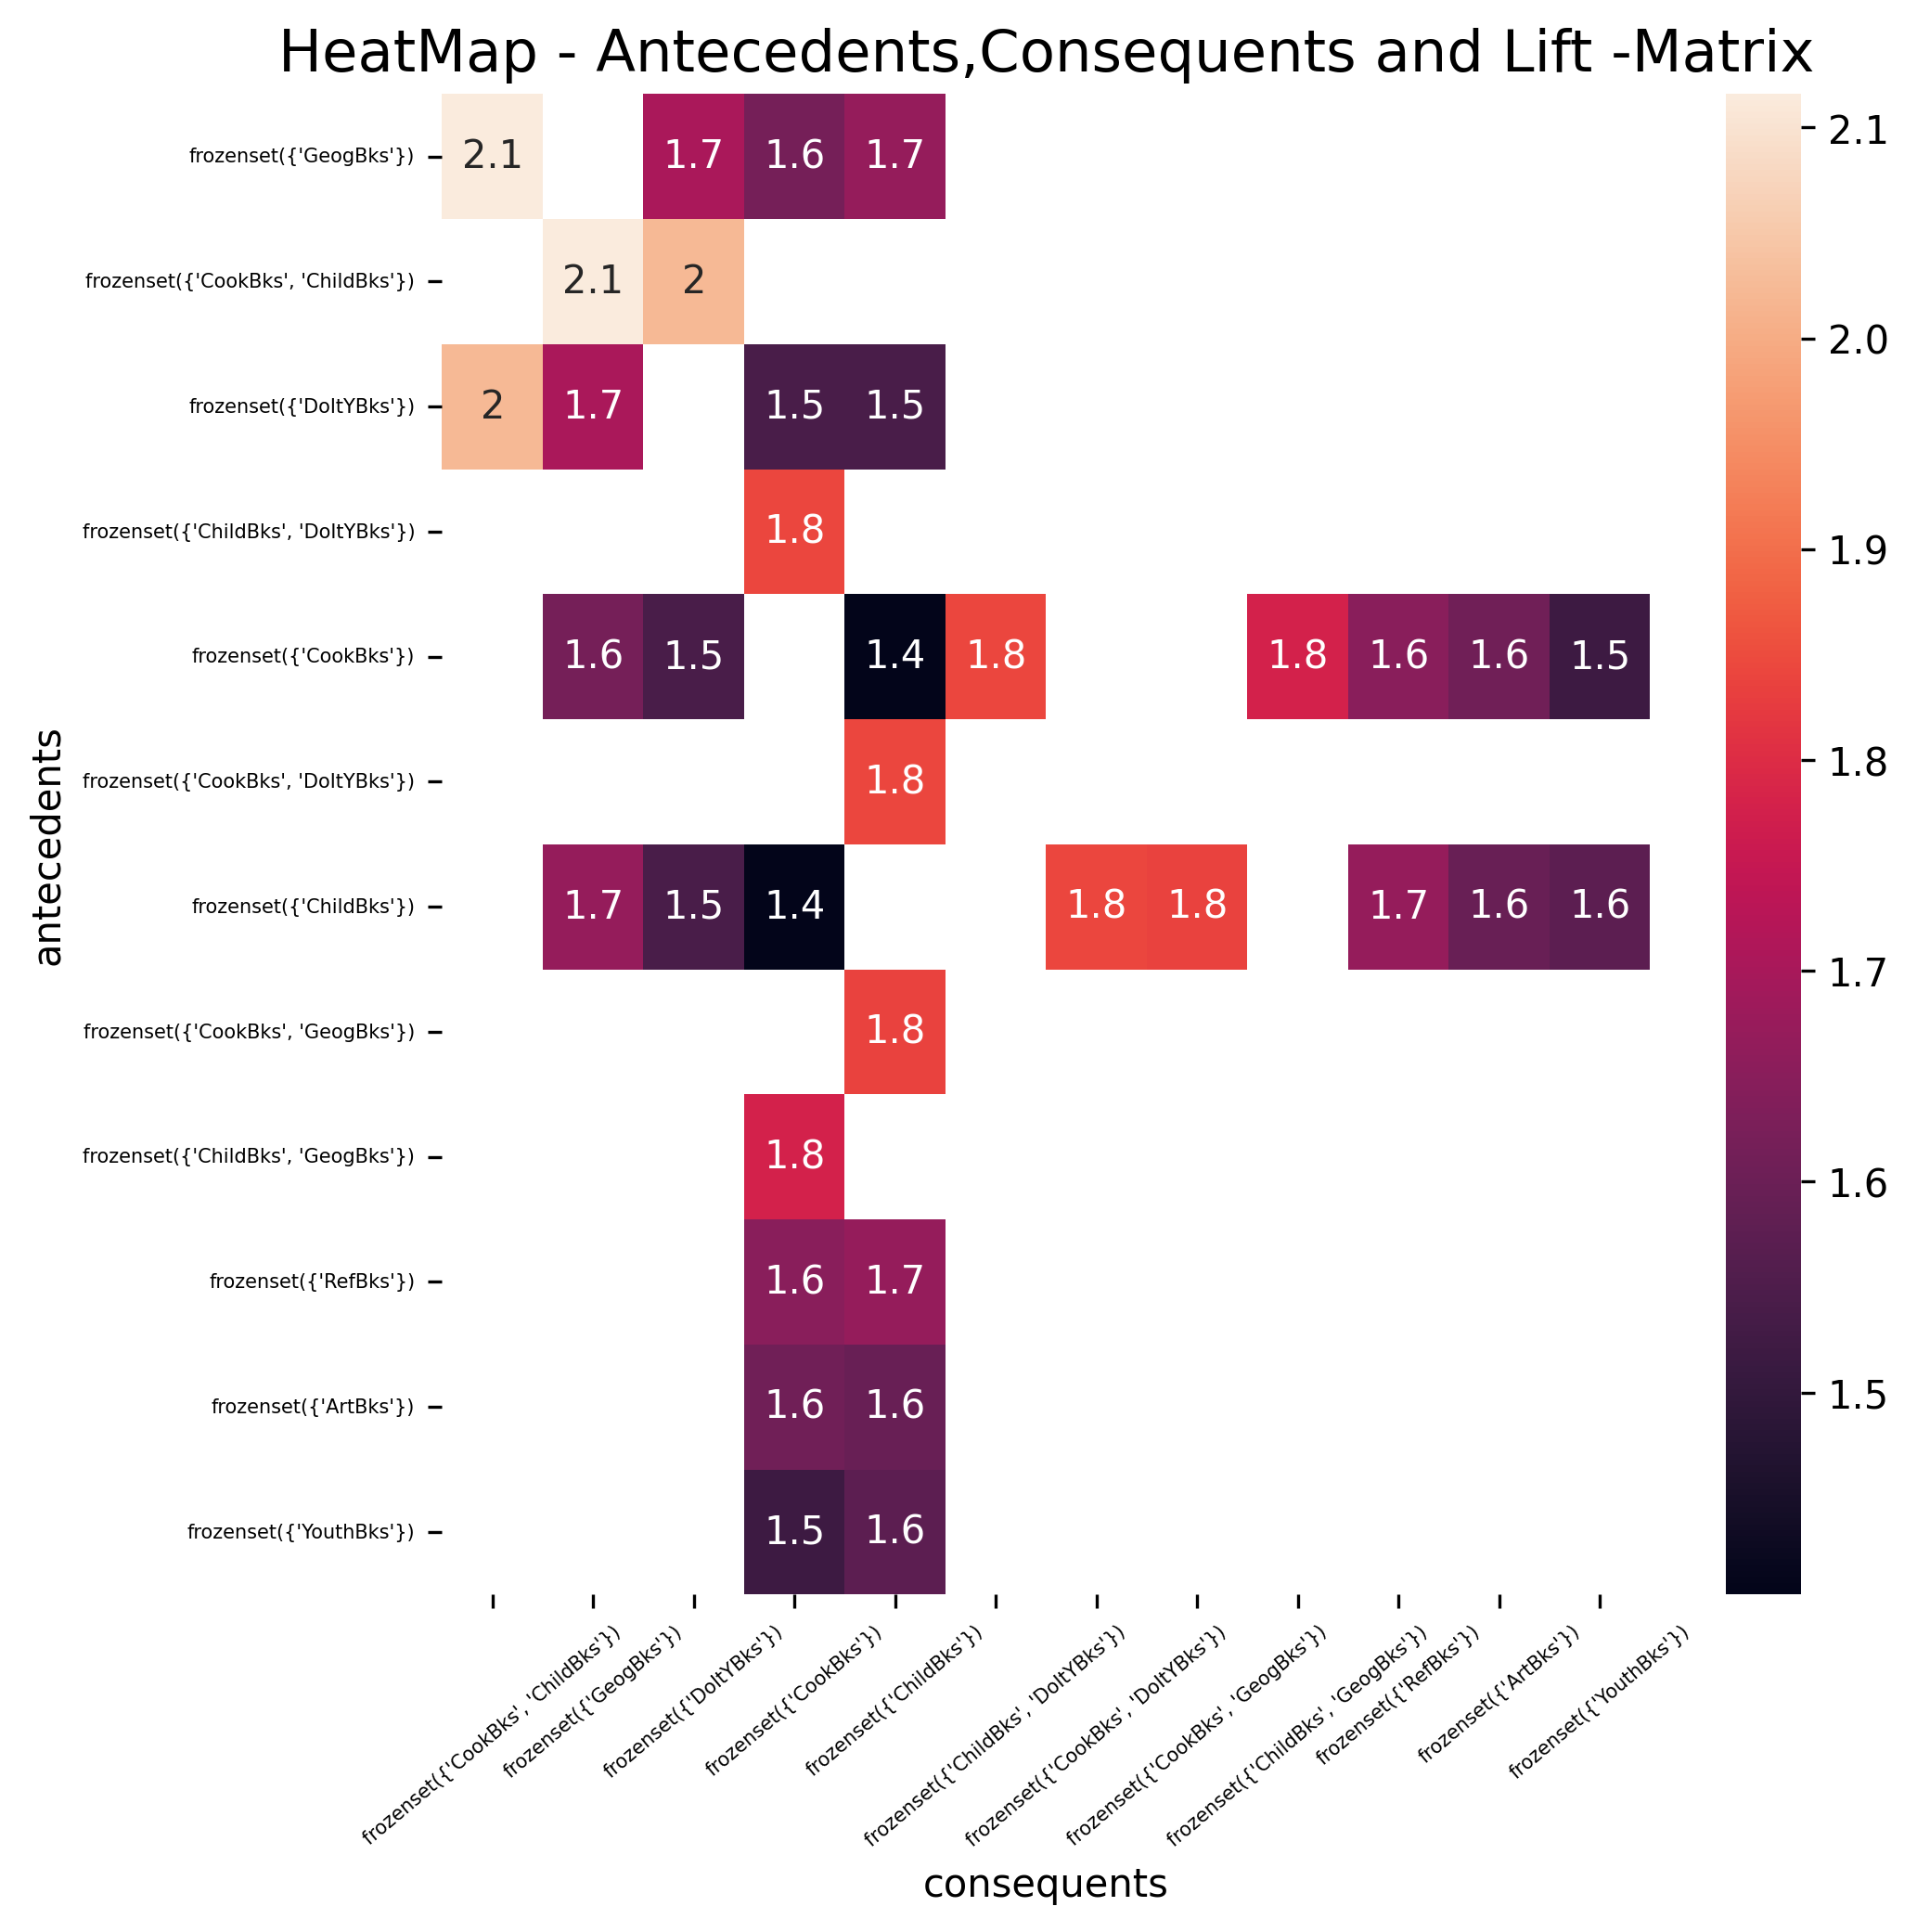


 Trail3 support = 15%,confidence=70%


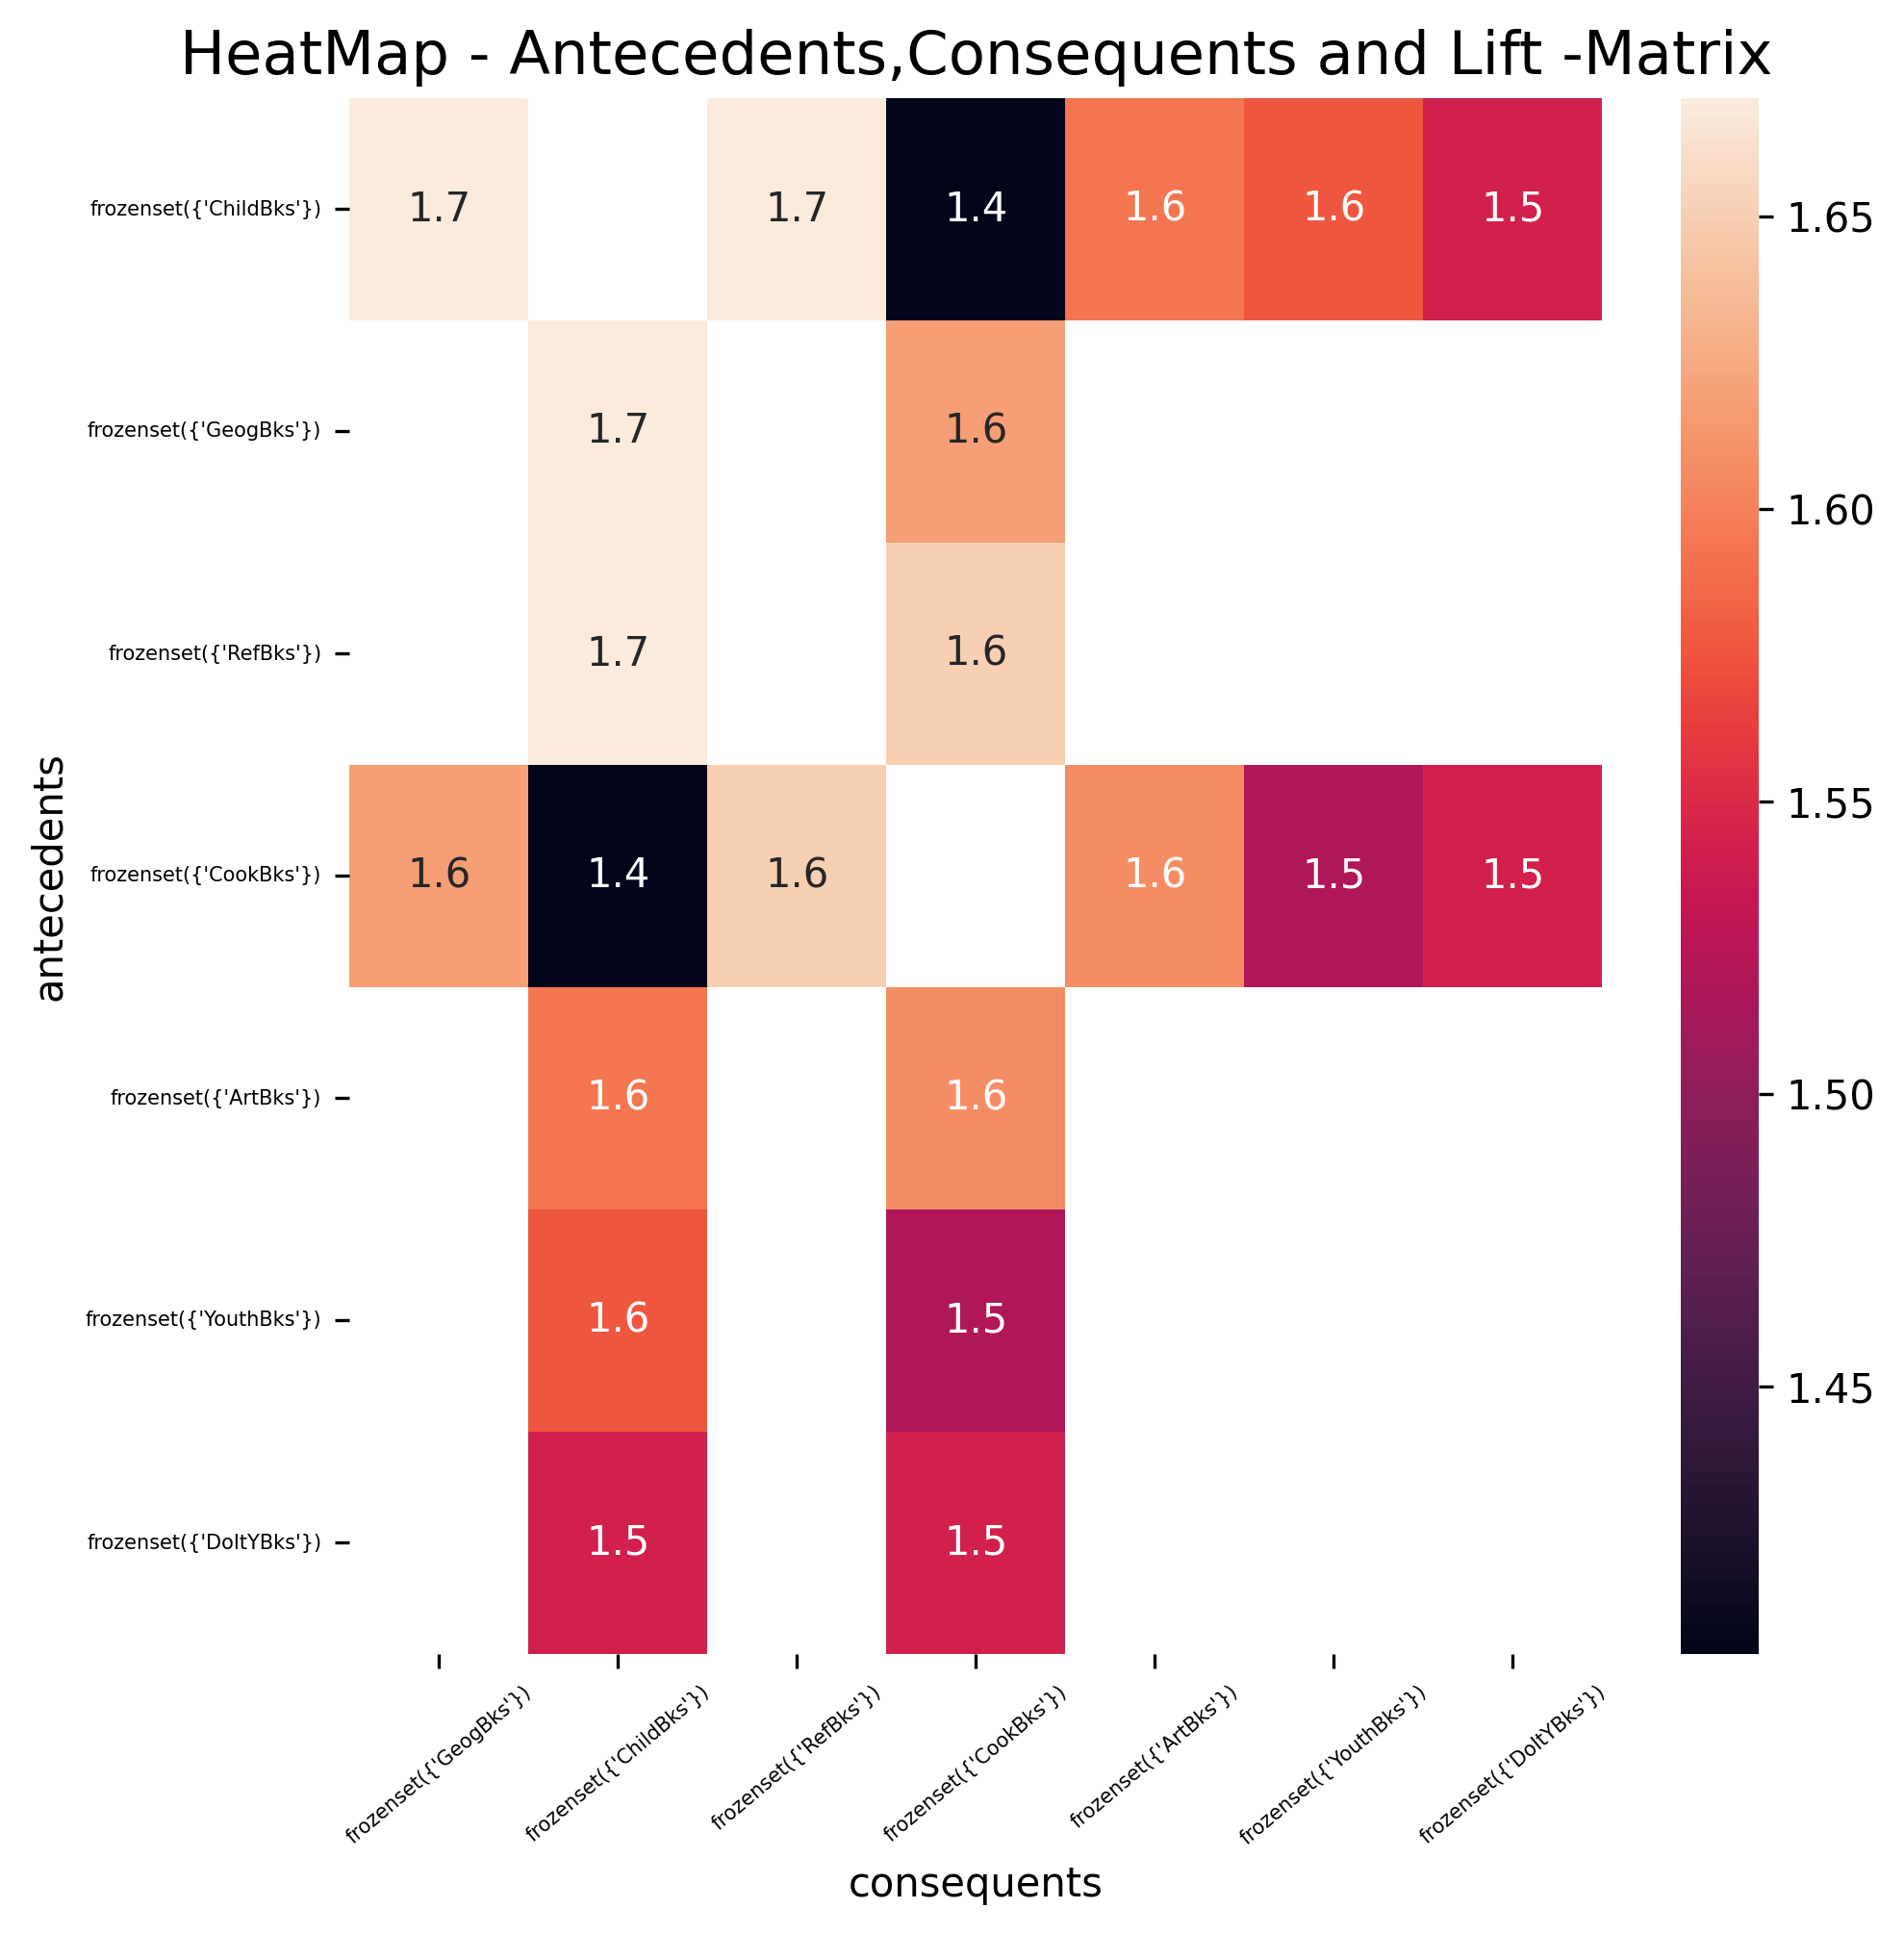

In [ ]:
print(' Trail1 support = 11%,confidence=30%')
lift_plot(rules1_sorted)
print('\n Trail2 support = 13%,confidence=50%')
lift_plot(rules2_sorted)
print('\n Trail3 support = 15%,confidence=70%')
lift_plot(rules3_sorted)

* Trail-1 and Trail-2 are giving a good and acceptable assocation.
* Trail_3 is giving different association due to support and confidence variation.